In [ ]:
import requests
import pandas as pd
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# Create a session with retry strategy
session = requests.Session()
retry_strategy = Retry(
    total=5,  # Retry up to 5 times
    backoff_factor=1,  # Wait 1s, 2s, 4s... between retries
    status_forcelist=[429, 500, 502, 503, 504],  # Retry on these HTTP errors
    allowed_methods=["GET"]
)
adapter = HTTPAdapter(max_retries=retry_strategy)
session.mount("https://", adapter)

# Base API URL and parameters
base_url = "https://world.openfoodfacts.org/api/v2/search"
params = {
    "categories": "chocolates",
    "fields": "code,product_name,brands,nutriments",
    "page_size": 100,
    "page": 1
}

# Initialize product list
all_products = []

# Loop until we collect exactly 12,000 records
while len(all_products) < 12000:
    try:
        # Make the GET request with timeout
        response = session.get(base_url, params=params, timeout=10)
        response.raise_for_status()  # Raise error for bad status codes

        # Parse JSON response
        data = response.json()
        products = data.get("products", [])

        # If no products returned, break the loop
        if not products:
            print("No more products found. Ending pagination.")
            break

        # Add products to the list
        all_products.extend(products)
        print(f"Page {params['page']} fetched — Total: {len(all_products)}")

        # Move to next page
        params["page"] += 1

        # Short delay to avoid overwhelming the server
        time.sleep(0.5)

    except requests.exceptions.RequestException as e:
        print(f"Error on page {params['page']}: {e}")
        time.sleep(2)  # Wait before retrying
        continue

# Trim to exactly 12,000 records
all_products = all_products[:12000]

# Convert to DataFrame
df_raw = pd.json_normalize(all_products)
print(f"Final dataset shape: {df_raw.shape}")


Page 1 fetched — Total: 100
Page 2 fetched — Total: 200
Page 3 fetched — Total: 300
Page 4 fetched — Total: 400
Page 5 fetched — Total: 500
Page 6 fetched — Total: 600
Page 7 fetched — Total: 700
Page 8 fetched — Total: 800
Page 9 fetched — Total: 900
Page 10 fetched — Total: 1000
Page 11 fetched — Total: 1100
Page 12 fetched — Total: 1200
Page 13 fetched — Total: 1300
Page 14 fetched — Total: 1400
Page 15 fetched — Total: 1499
Page 16 fetched — Total: 1599
Page 17 fetched — Total: 1699
Page 18 fetched — Total: 1799
Page 19 fetched — Total: 1899
Page 20 fetched — Total: 1999
Page 21 fetched — Total: 2099
Page 22 fetched — Total: 2199
Page 23 fetched — Total: 2299
Page 24 fetched — Total: 2399
Page 25 fetched — Total: 2499
Page 26 fetched — Total: 2599
Page 27 fetched — Total: 2699
Page 28 fetched — Total: 2799
Page 29 fetched — Total: 2899
Page 30 fetched — Total: 2999
Page 31 fetched — Total: 3099
Page 32 fetched — Total: 3199
Page 33 fetched — Total: 3299
Page 34 fetched — Total: 339

In [12]:
import requests  # use a while loop and collect approx 12000

url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=1000&page=1"

response = requests.get(url)

data = response.json()

data['products']

[{'brands': 'Sidi Ali',
  'code': '6111035000430',
  'nutriments': {'carbohydrates': 42,
   'carbohydrates_100g': 4.2,
   'carbohydrates_serving': 42,
   'carbohydrates_unit': 'g',
   'carbohydrates_value': 42,
   'energy': 20,
   'energy-kcal': 0,
   'energy-kcal_100g': 0,
   'energy-kcal_serving': 0,
   'energy-kcal_unit': 'kcal',
   'energy-kcal_value': 0,
   'energy-kcal_value_computed': 168,
   'energy-kj': 20,
   'energy-kj_100g': 2,
   'energy-kj_serving': 20,
   'energy-kj_unit': 'kj',
   'energy-kj_value': 20,
   'energy-kj_value_computed': 714,
   'energy_100g': 2,
   'energy_serving': 20,
   'energy_unit': 'kj',
   'energy_value': 20,
   'fat': 0,
   'fat_100g': 0,
   'fat_serving': 0,
   'fat_unit': 'g',
   'fat_value': 0,
   'fiber': 0,
   'fiber_100g': 0,
   'fiber_serving': 0,
   'fiber_unit': 'g',
   'fiber_value': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_100g': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_serving': 0,
   'fruits-vegetabl

In [13]:
data.keys()

dict_keys(['count', 'page', 'page_count', 'page_size', 'products', 'skip'])

In [14]:
import pandas as pd

df = pd.DataFrame(data['products'])

df

,brands,code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,"pepsi,PepsiCo",6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا
...,...,...,...,...
95,sos,6111251753912,"{'carbohydrates': 8.7, 'carbohydrates_100g': 8...",611251753912
96,سلطان,6111248360130,"{'bicarbonate': 0.402, 'bicarbonate_100g': 0.4...",Aïn Soltane
97,8dh,6111003031107,"{'carbohydrates': 0.6, 'carbohydrates_100g': 0...",
98,Bjorg,3229820100234,"{'carbohydrates': 65, 'carbohydrates_100g': 65...",Fourrés Chocolat Noir


In [15]:
df['nutriments']

0     {'carbohydrates': 42, 'carbohydrates_100g': 4....
1     {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...
2     {'chloride': 0.014, 'chloride_100g': 0.014, 'c...
3     {'fruits-vegetables-legumes-estimate-from-ingr...
4     {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
                            ...                        
95    {'carbohydrates': 8.7, 'carbohydrates_100g': 8...
96    {'bicarbonate': 0.402, 'bicarbonate_100g': 0.4...
97    {'carbohydrates': 0.6, 'carbohydrates_100g': 0...
98    {'carbohydrates': 65, 'carbohydrates_100g': 65...
99    {'carbohydrates': 63, 'carbohydrates_100g': 63...
Name: nutriments, Length: 100, dtype: object

In [3]:
import requests
import time

products = []
page = 1
target = 12000

print("Starting data collection...")

while len(products) < target:
    # Dynamically insert the page number into the URL
    url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=1000&page={page}"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        batch = data.get("products", [])

        if not batch:
            print("No more products found. Ending early.")
            break

        products.extend(batch)
        print(f"Page {page} fetched — Total collected: {len(products)}")

        page += 1
        time.sleep(0.5)  # Avoid hammering the server

    except requests.exceptions.RequestException as e:
        print(f"Error on page {page}: {e}")
        print("Retrying in 3 seconds...")
        time.sleep(3)

print(f"\n Done! Total products collected: {len(products)}")


Starting data collection...
Page 1 fetched — Total collected: 100
Page 2 fetched — Total collected: 200
Page 3 fetched — Total collected: 300
Page 4 fetched — Total collected: 400
Page 5 fetched — Total collected: 500
Page 6 fetched — Total collected: 600
Page 7 fetched — Total collected: 700
Page 8 fetched — Total collected: 800
Page 9 fetched — Total collected: 900
Page 10 fetched — Total collected: 1000
Page 11 fetched — Total collected: 1100
Page 12 fetched — Total collected: 1200
Page 13 fetched — Total collected: 1300
Page 14 fetched — Total collected: 1400
Page 15 fetched — Total collected: 1499
Page 16 fetched — Total collected: 1599
Page 17 fetched — Total collected: 1699
Page 18 fetched — Total collected: 1799
Page 19 fetched — Total collected: 1899
Page 20 fetched — Total collected: 1999
Page 21 fetched — Total collected: 2099
Page 22 fetched — Total collected: 2199
Page 23 fetched — Total collected: 2299
Page 24 fetched — Total collected: 2399
Page 25 fetched — Total collec

In [ ]:
batch

In [16]:
df_choco.columns

Index(['brands', 'code', 'nutriments', 'product_name'], dtype='object')

In [21]:
# Rename columns 
df_choco.rename(columns={
    "code": "product_code",
    "brands": "brand"
}, inplace=True)

# Confirm updated column names
print(" Updated Columns:")
print(df_choco.columns)


 Updated Columns:
Index(['brand', 'product_code', 'nutriments', 'product_name'], dtype='object')


In [22]:
df_choco

,brand,product_code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,"pepsi,PepsiCo",6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا
...,...,...,...,...
11995,Nairn’s,0612322001612,"{'carbohydrates': 63.8, 'carbohydrates_100g': ...",nairns dark chocolate chip oat biscuits
11996,Swizzels,5010478014510,"{'carbohydrates': 84, 'carbohydrates_100g': 84...",Drumstick Squashies
11997,"Twinings, Sainsburys",0070177067779,"{'carbohydrates': 0, 'carbohydrates_100g': 0, ...",twinings tea
11998,NaN,88882222,"{'carbohydrates': 3.2, 'carbohydrates_100g': 3...",Eau de Coco


In [23]:
df_choco['nutriments']

0        {'carbohydrates': 42, 'carbohydrates_100g': 4....
1        {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...
2        {'chloride': 0.014, 'chloride_100g': 0.014, 'c...
3        {'fruits-vegetables-legumes-estimate-from-ingr...
4        {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
                               ...                        
11995    {'carbohydrates': 63.8, 'carbohydrates_100g': ...
11996    {'carbohydrates': 84, 'carbohydrates_100g': 84...
11997    {'carbohydrates': 0, 'carbohydrates_100g': 0, ...
11998    {'carbohydrates': 3.2, 'carbohydrates_100g': 3...
11999    {'carbohydrates': 62, 'carbohydrates_100g': 62...
Name: nutriments, Length: 12000, dtype: object

In [ ]:
import pandas as pd

# Convert the list of product dictionaries to a DataFrame
df_choco = pd.DataFrame(products)

# Display total records
print(f" Total records in DataFrame: {len(df_choco)}")

# Show a sample of the data
print(df_choco.head())


📦 Total records in DataFrame: 12097
                                 brands           code  \
0                              Sidi Ali  6111035000430   
1                                Jaouda  6111242100992   
2                              sidi ali  6111035002175   
3  Les Eaux Minérales d'oulmès,Sidi Ali  6111035000058   
4                         pepsi,PepsiCo  6111252421568   

                                          nutriments            product_name  
0  {'carbohydrates': 42, 'carbohydrates_100g': 4....                Sidi Ali  
1  {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...                   Perly  
2  {'chloride': 0.014, 'chloride_100g': 0.014, 'c...                Sidi Ali  
3  {'fruits-vegetables-legumes-estimate-from-ingr...  Eau minérale naturelle  
4  {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...                اكوافينا  


In [8]:
df_choco = df_choco.iloc[:12000]
print(f"Trimmed to: {len(df_choco)} records")


Trimmed to: 12000 records


In [10]:
import os

# Create 'data' directory if it doesn't exist
# os.makedirs("data", exist_ok=True)

def save_choco_data(df, folder="data", filename="chococrunch_final"):
    os.makedirs(folder, exist_ok=True)
    df.to_json(f"{folder}/{filename}.json", orient="records", lines=False)
    df.to_csv(f"{folder}/{filename}.csv", index=False)
    print(f"✅ Saved to {folder}/{filename}.json and .csv")

# Usage
save_choco_data(df_choco)


✅ Saved to data/chococrunch_final.json and .csv


In [ ]:
import pandas as pd

# Load the dataset 
df = pd.read_csv("data/chococrunch_final.csv")

# Preview the data
print(" Data Preview:")
print(df.head())


🔍 Data Preview:
                                 brands           code  \
0                              Sidi Ali  6111035000430   
1                                Jaouda  6111242100992   
2                              sidi ali  6111035002175   
3  Les Eaux Minérales d'oulmès,Sidi Ali  6111035000058   
4                         pepsi,PepsiCo  6111252421568   

                                          nutriments            product_name  
0  {'carbohydrates': 42, 'carbohydrates_100g': 4....                Sidi Ali  
1  {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...                   Perly  
2  {'chloride': 0.014, 'chloride_100g': 0.014, 'c...                Sidi Ali  
3  {'fruits-vegetables-legumes-estimate-from-ingr...  Eau minérale naturelle  
4  {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...                اكوافينا  


In [24]:
df_choco['nutriments']

0        {'carbohydrates': 42, 'carbohydrates_100g': 4....
1        {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...
2        {'chloride': 0.014, 'chloride_100g': 0.014, 'c...
3        {'fruits-vegetables-legumes-estimate-from-ingr...
4        {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
                               ...                        
11995    {'carbohydrates': 63.8, 'carbohydrates_100g': ...
11996    {'carbohydrates': 84, 'carbohydrates_100g': 84...
11997    {'carbohydrates': 0, 'carbohydrates_100g': 0, ...
11998    {'carbohydrates': 3.2, 'carbohydrates_100g': 3...
11999    {'carbohydrates': 62, 'carbohydrates_100g': 62...
Name: nutriments, Length: 12000, dtype: object

In [25]:
type(df_choco['nutriments'])

pandas.core.series.Series

In [26]:
import pandas as pd

# Step 1: Flatten the dictionaries in the 'nutriments' column
nutrients_df = pd.json_normalize(df_choco['nutriments'])

# Step 2: Preview the new DataFrame
print(nutrients_df.head())


   carbohydrates  carbohydrates_100g  carbohydrates_serving  \
0           42.0                 4.2                   42.0   
1            9.4                 9.4                    9.4   
2            NaN                 NaN                    NaN   
3            NaN                 NaN                    NaN   
4            0.0                 0.0                    0.0   

  carbohydrates_unit  carbohydrates_value  energy  energy-kcal  \
0                  g                 42.0    20.0          0.0   
1                  g                  9.4   406.0         97.0   
2                NaN                  NaN     NaN          NaN   
3                NaN                  NaN     NaN          NaN   
4                  g                  0.0     0.0          0.0   

   energy-kcal_100g  energy-kcal_serving energy-kcal_unit  ...  \
0               0.0                  0.0             kcal  ...   
1              97.0                 97.0             kcal  ...   
2               NaN       

In [27]:
# List of required columns
required_columns = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

# Extract only those columns
nutrients_selected = nutrients_df[required_columns]

# Preview the result
print(nutrients_selected.head())


   energy-kcal_value  energy-kj_value  carbohydrates_value  sugars_value  \
0                0.0             20.0                 42.0          14.0   
1               97.0            406.0                  9.4           NaN   
2                NaN              NaN                  NaN           NaN   
3                NaN              NaN                  NaN           NaN   
4                0.0              0.0                  0.0           0.0   

   fat_value  saturated-fat_value  proteins_value  fiber_value  salt_value  \
0        0.0                  0.0             0.0          0.0     0.00000   
1        3.0                  NaN             8.0          NaN         NaN   
2        NaN                  NaN             NaN          NaN    65.00000   
3        NaN                  NaN             NaN          NaN    65.00000   
4        0.0                  0.0             0.0          0.0     0.00508   

   sodium_value  nova-group  nutrition-score-fr  \
0      0.000000        

In [ ]:
# Select key columns from original DataFrame
product_info = df_choco[['product_code', 'product_name', 'brand']]

In [ ]:

# Reset index on both DataFrames to align them properly
product_info = product_info.reset_index(drop=True)

In [30]:
nutrients_selected = nutrients_selected.reset_index(drop=True)

In [31]:
# Merge two dataframes horizontally
df_final = pd.concat([product_info, nutrients_selected], axis=1)

In [32]:
# Preview the df_final
print(df_final.head())


    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   Perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  energy-kcal_value  energy-kj_value  \
0                              Sidi Ali                0.0             20.0   
1                                Jaouda               97.0            406.0   
2                              sidi ali                NaN              NaN   
3  Les Eaux Minérales d'oulmès,Sidi Ali                NaN              NaN   
4                         pepsi,PepsiCo                0.0              0.0   

   carbohydrates_value  sugars_value  fat_value  saturated-fat_value  \
0                 42.0          14.0        0.0                  0.0   
1                  9.4           NaN        3.0                  NaN   
2                  NaN           NaN        

In [54]:
df_final.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g'],
      dtype='object')

In [ ]:
df_final.shape  # Rows and columns

(12000, 16)

In [35]:
df_final.info()              # Data types + non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   product_code                                           12000 non-null  object 
 1   product_name                                           11742 non-null  object 
 2   brand                                                  11460 non-null  object 
 3   energy-kcal_value                                      11225 non-null  float64
 4   energy-kj_value                                        6449 non-null   float64
 5   carbohydrates_value                                    11227 non-null  float64
 6   sugars_value                                           11031 non-null  float64
 7   fat_value                                              11254 non-null  float64
 8   saturated-fat_value                           

In [36]:
df_final.isnull().sum()                      # Count of nulls per column

product_code                                                0
product_name                                              258
brand                                                     540
energy-kcal_value                                         775
energy-kj_value                                          5551
carbohydrates_value                                       773
sugars_value                                              969
fat_value                                                 746
saturated-fat_value                                      1049
proteins_value                                            757
fiber_value                                              3808
salt_value                                               1085
sodium_value                                             1085
nova-group                                               1281
nutrition-score-fr                                       1679
fruits-vegetables-nuts-estimate-from-ingredients_100g     741
dtype: i

In [37]:
df_final.isnull().mean().sort_values()       # % of missing values per column

product_code                                             0.000000
product_name                                             0.021500
brand                                                    0.045000
fruits-vegetables-nuts-estimate-from-ingredients_100g    0.061750
fat_value                                                0.062167
proteins_value                                           0.063083
carbohydrates_value                                      0.064417
energy-kcal_value                                        0.064583
sugars_value                                             0.080750
saturated-fat_value                                      0.087417
sodium_value                                             0.090417
salt_value                                               0.090417
nova-group                                               0.106750
nutrition-score-fr                                       0.139917
fiber_value                                              0.317333
energy-kj_

In [38]:
# Display % of missing values per column, rounded to 2 decimal places
(df_final.isnull().mean() * 100).round(2).sort_values()


product_code                                              0.00
product_name                                              2.15
brand                                                     4.50
fruits-vegetables-nuts-estimate-from-ingredients_100g     6.18
fat_value                                                 6.22
proteins_value                                            6.31
carbohydrates_value                                       6.44
energy-kcal_value                                         6.46
sugars_value                                              8.08
saturated-fat_value                                       8.74
sodium_value                                              9.04
salt_value                                                9.04
nova-group                                               10.68
nutrition-score-fr                                       13.99
fiber_value                                              31.73
energy-kj_value                                        

In [39]:
df_final[df_final.isnull().any(axis=1)]      # Rows with any missing values


,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,6111035000430,Sidi Ali,Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.000000
1,6111242100992,Perly,Jaouda,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.000000
2,6111035002175,Sidi Ali,sidi ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.000000
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.000000
4,6111252421568,اكوافينا,"pepsi,PepsiCo",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,6111069000819,Thé vert en grain najma,Sultan,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00000,0.000000,NaN,NaN,NaN
11996,5010478014510,Drumstick Squashies,Swizzels,356.0,NaN,84.0,63.0,0.2,0.0,3.4,NaN,0.07000,0.028000,4.0,19.0,0.351562
11997,0070177067779,twinings tea,"Twinings, Sainsburys",2.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00000,0.000000,1.0,-6.0,100.000000
11998,88882222,Eau de Coco,NaN,12.0,NaN,3.2,3.2,0.0,0.0,0.0,NaN,0.00300,0.001200,NaN,3.0,NaN


In [ ]:
df_final.duplicated().sum()             # Count of duplicate rows

np.int64(0)

In [41]:
# Count columns with more than 50% missing values
missing_ratio = df_final.isnull().mean()
high_missing_cols = missing_ratio[missing_ratio > 0.5]
print(f"Number of columns with >50% missing values: {len(high_missing_cols)}")
print(high_missing_cols)


Number of columns with >50% missing values: 0
Series([], dtype: float64)


In [42]:
(df_final.isnull().mean() > 0.5).sum()


np.int64(0)

In [44]:
# Fill missing product names and brands with "Unknown"
df_final['product_name'].fillna("Unknown", inplace=True)  # ~2.15% missing
df_final['brand'].fillna("Unknown", inplace=True)         # ~4.5% missing


C:\Users\Rupa\AppData\Local\Temp\ipykernel_26140\2645348030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['product_name'].fillna("Unknown", inplace=True)  # ~2.15% missing
C:\Users\Rupa\AppData\Local\Temp\ipykernel_26140\2645348030.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [45]:
df_final.fillna({'product_name': 'Unknown', 'brand': 'Unknown'}, inplace=True)


In [46]:
# Select numeric columns
numeric_cols = df_final.select_dtypes(include='number').columns

# Fill missing numeric values with column medians
df_final[numeric_cols] = df_final[numeric_cols].fillna(df_final[numeric_cols].median())


In [48]:
print(df_final.head())


    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   Perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  energy-kcal_value  energy-kj_value  \
0                              Sidi Ali                0.0             20.0   
1                                Jaouda               97.0            406.0   
2                              sidi ali              242.0           1193.0   
3  Les Eaux Minérales d'oulmès,Sidi Ali              242.0           1193.0   
4                         pepsi,PepsiCo                0.0              0.0   

   carbohydrates_value  sugars_value  fat_value  saturated-fat_value  \
0                 42.0          14.0        0.0                  0.0   
1                  9.4           4.1        3.0                  1.4   
2                 15.1           4.1        

In [123]:
df_final.to_csv('data/df_final.csv', index=False)


In [49]:
print(df_final['product_name'].nunique())
print(df_final['product_name'].value_counts().head(10))
print(df_final['product_name'].isnull().sum())


10190
product_name
                         302
Unknown                  259
Tomato Ketchup            22
Mayonnaise                19
Nutella                   17
Ketchup                   15
Crunchy Peanut Butter     14
Skyr                      14
Original                  12
Corn Flakes               12
Name: count, dtype: int64
0


In [50]:
singletons = df_final['product_name'].value_counts()
print((singletons == 1).sum())


9505


In [51]:
# Count the number of unique product names for each brand
brand_product_counts = df_final.groupby('brand')['product_name'].nunique().sort_values(ascending=False)

# Display the top brands with the most product variety
print(brand_product_counts.head(10))


brand
Hacendado      324
Unknown        313
Tesco          261
Carrefour      134
Bjorg           96
Lidl            88
Sainsbury's     78
Heinz           78
Nestlé          77
                73
Name: product_name, dtype: int64


In [52]:
nutrient_cols = ['fiber_value', 'sugars_value', 'fat_value', 'proteins_value']


In [57]:
import numpy as np

# Clean the brand column
df_final['brand'] = df_final['brand'].replace(['Unknown', ''], np.nan)

# Identify strong brands (brands with ≥ 5 unique products)
brand_counts = df_final.groupby('brand')['product_name'].nunique()
strong_brands = brand_counts[brand_counts >= 5].index
is_strong_brand = df_final['brand'].isin(strong_brands)

# Impute fiber_value
df_final.loc[is_strong_brand, 'fiber_value'] = (
    df_final.loc[is_strong_brand]
    .groupby('brand')['fiber_value']
    .transform(lambda x: x.fillna(x.median()))
)
df_final['fiber_value'] = df_final['fiber_value'].fillna(df_final['fiber_value'].median())

# Impute sugars_value
df_final.loc[is_strong_brand, 'sugars_value'] = (
    df_final.loc[is_strong_brand]
    .groupby('brand')['sugars_value']
    .transform(lambda x: x.fillna(x.median()))
)
df_final['sugars_value'] = df_final['sugars_value'].fillna(df_final['sugars_value'].median())

# Impute fat_value
df_final.loc[is_strong_brand, 'fat_value'] = (
    df_final.loc[is_strong_brand]
    .groupby('brand')['fat_value']
    .transform(lambda x: x.fillna(x.median()))
)
df_final['fat_value'] = df_final['fat_value'].fillna(df_final['fat_value'].median())

# Impute proteins_value
df_final.loc[is_strong_brand, 'proteins_value'] = (
    df_final.loc[is_strong_brand]
    .groupby('brand')['proteins_value']
    .transform(lambda x: x.fillna(x.median()))
)
df_final['proteins_value'] = df_final['proteins_value'].fillna(df_final['proteins_value'].median())


In [55]:
df_final.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g'],
      dtype='object')

In [59]:
df_final.isna().sum()


product_code                                               0
product_name                                               0
brand                                                    652
energy-kcal_value                                          0
energy-kj_value                                            0
carbohydrates_value                                        0
sugars_value                                               0
fat_value                                                  0
saturated-fat_value                                        0
proteins_value                                             0
fiber_value                                                0
salt_value                                                 0
sodium_value                                               0
nova-group                                                 0
nutrition-score-fr                                         0
fruits-vegetables-nuts-estimate-from-ingredients_100g      0
dtype: int64

In [60]:
# Replace missing brands with a placeholder
df_final['brand'] = df_final['brand'].fillna('Brand_Unavailable')

# Create a flag to track which rows were originally missing
df_final['brand_missing'] = df_final['brand'] == 'Brand_Unavailable'


In [61]:
df_final.isna().sum()

product_code                                             0
product_name                                             0
brand                                                    0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
brand_missing                                           

In [62]:
df_final.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'brand_missing'],
      dtype='object')

In [63]:
df_final['product_name'] = (
    df_final['product_name']
    .str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)
)


In [64]:
# Calculate the ratio of sugar to total carbohydrates
# This helps identify products where sugar dominates the carb content
df_final['sugar_to_carb_ratio'] = df_final['sugars_value'] / df_final['carbohydrates_value']

# Replace infinite values (from division by zero) with NaN for safety
df_final['sugar_to_carb_ratio'] = df_final['sugar_to_carb_ratio'].replace([np.inf, -np.inf], np.nan)


In [65]:
# Classify products based on energy content per 100g
# Helps segment products into dietary categories
def classify_calories(kcal):
    if kcal < 100:
        return 'Low'
    elif kcal <= 300:
        return 'Moderate'
    else:
        return 'High'

df_final['calorie_category'] = df_final['energy-kcal_value'].apply(classify_calories)


In [66]:
# Classify products based on sugar content per 100g
# Helps identify high-sugar items for health analysis
def classify_sugar(sugar):
    if sugar < 5:
        return 'Low Sugar'
    elif sugar <= 15:
        return 'Moderate Sugar'
    else:
        return 'High Sugar'

df_final['sugar_category'] = df_final['sugars_value'].apply(classify_sugar)


In [67]:
# Flag products as ultra-processed based on NOVA classification
# NOVA group 4 = ultra-processed
df_final['is_ultra_processed'] = df_final['nova-group'].apply(lambda x: 'Yes' if x == 4 else 'No')


In [68]:
df_final.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'brand_missing', 'sugar_to_carb_ratio', 'calorie_category',
       'sugar_category', 'is_ultra_processed'],
      dtype='object')

Step 3: Exploratory Data Analysis (EDA)

In [69]:
# Print the shape of the dataset: (rows, columns)
print("Shape:", df_final.shape)

Shape: (12000, 21)


In [91]:
# Display column data types and non-null counts
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   product_code                                           12000 non-null  object 
 1   product_name                                           12000 non-null  object 
 2   brand                                                  12000 non-null  object 
 3   energy-kcal_value                                      12000 non-null  float64
 4   energy-kj_value                                        12000 non-null  float64
 5   carbohydrates_value                                    11332 non-null  float64
 6   sugars_value                                           12000 non-null  float64
 7   fat_value                                              12000 non-null  float64
 8   saturated-fat_value                           

In [92]:
# Show summary statistics for numerical columns
df_final.describe()

,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,sugar_zscore
count,12000.000000,12000.000000,11332.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,11332.000000,1.200000e+04
mean,278.635642,1209.127114,30.505975,10.875868,14.432618,4.843907,7.253566,5.092702e+08,16.906595,6.762638,3.386667,8.711083,16.950245,5.043831,-2.072416e-17
std,481.690063,621.763972,97.367490,18.765497,37.778722,10.881049,29.562619,5.578775e+10,797.684789,319.073916,0.963794,9.131432,29.904133,481.434448,1.000042e+00
min,0.000000,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-15.000000,-0.066406,0.000000,-5.795914e-01
25%,97.900000,1075.300000,6.300000,1.200000,1.500000,0.300000,1.600000,1.200000e+00,0.070000,0.028000,3.000000,2.000000,0.000000,0.110855,-5.156416e-01
50%,242.000000,1193.000000,15.100000,4.100000,6.200000,1.400000,5.600000,2.500000e+00,0.370000,0.148000,4.000000,7.000000,0.123892,0.416731,-3.610962e-01
75%,419.000000,1348.250000,55.000000,11.500000,20.000000,5.223525,9.000000,3.800000e+00,0.950000,0.380000,4.000000,14.000000,18.640475,0.909091,3.326095e-02
max,45793.499044,3768.000000,8989.000000,895.000000,3400.000000,595.000000,3000.000000,6.111242e+12,85000.000000,34000.000000,4.000000,51.000000,197.200000,51250.000000,4.711631e+01


In [93]:
# Count missing values in each column
missing_summary = df_final.isnull().sum()
# Display only columns with missing values
print(missing_summary[missing_summary > 0])

carbohydrates_value    668
sugar_to_carb_ratio    668
dtype: int64


In [94]:
df_final[df_final['carbohydrates_value'] == 0].shape[0]
df_final['carbohydrates_value'].isnull().sum()


np.int64(668)

In [95]:
df_final['sugars_value'].isnull().sum()


np.int64(0)

In [96]:
# Replace 0 carbs with NaN to avoid division errors
df_final['carbohydrates_value'] = df_final['carbohydrates_value'].replace(0, np.nan)

# Perform vectorized division
df_final['sugar_to_carb_ratio'] = df_final['sugars_value'] / df_final['carbohydrates_value']


In [97]:
# Count missing (NaN) values in each column
missing_summary = df_final.isnull().sum()

# Filter and display only columns that have missing values
missing_summary = missing_summary[missing_summary > 0]
print("Columns with missing values:\n", missing_summary)


Columns with missing values:
 carbohydrates_value    668
sugar_to_carb_ratio    668
dtype: int64


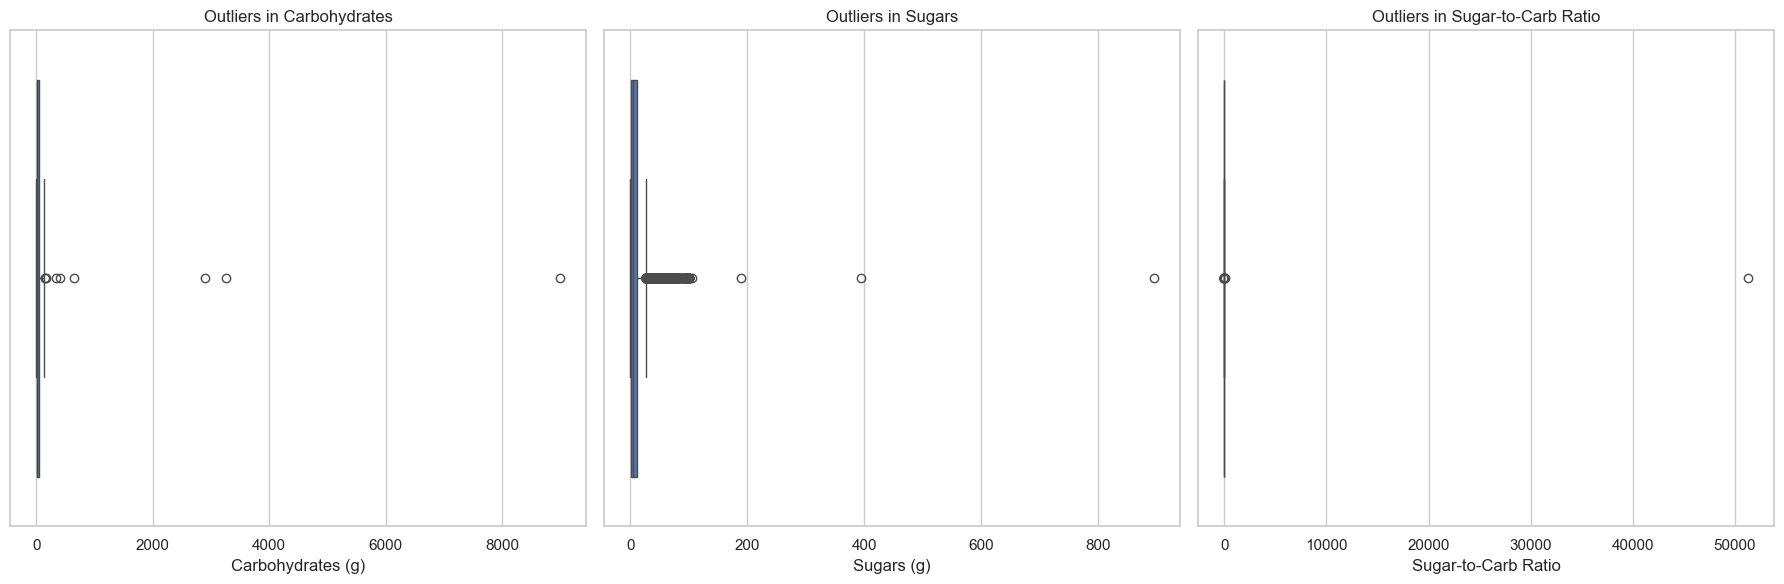

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for consistency
sns.set_theme(style="whitegrid")

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 plots, wide layout

# Boxplot for carbohydrates_value
sns.boxplot(x=df_final['carbohydrates_value'], ax=axes[0])
axes[0].set_title('Outliers in Carbohydrates')
axes[0].set_xlabel('Carbohydrates (g)')

# Boxplot for sugars_value
sns.boxplot(x=df_final['sugars_value'], ax=axes[1])
axes[1].set_title('Outliers in Sugars')
axes[1].set_xlabel('Sugars (g)')

# Boxplot for sugar_to_carb_ratio
sns.boxplot(x=df_final['sugar_to_carb_ratio'], ax=axes[2])
axes[2].set_title('Outliers in Sugar-to-Carb Ratio')
axes[2].set_xlabel('Sugar-to-Carb Ratio')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


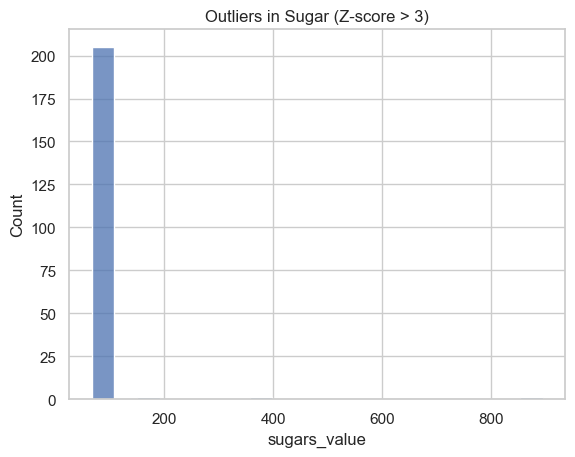

In [82]:
# Flag outliers using Z-score
from scipy.stats import zscore
df_final['sugar_zscore'] = zscore(df_final['sugars_value'])

# Plot only outliers
outliers = df_final[df_final['sugar_zscore'].abs() > 3]
sns.histplot(outliers['sugars_value'], bins=20)
plt.title('Outliers in Sugar (Z-score > 3)')
plt.show()


In [83]:
df_final['sugar_zscore']

0        0.166490
1       -0.361096
2       -0.361096
3       -0.361096
4       -0.579591
           ...   
11995    0.432947
11996    2.777774
11997   -0.579591
11998   -0.409059
11999    1.125737
Name: sugar_zscore, Length: 12000, dtype: float64

In [84]:
# Flag products with extreme sugar values
outliers = df_final[df_final['sugar_zscore'].abs() > 3]
print("Number of sugar outliers:", outliers.shape[0])


Number of sugar outliers: 208


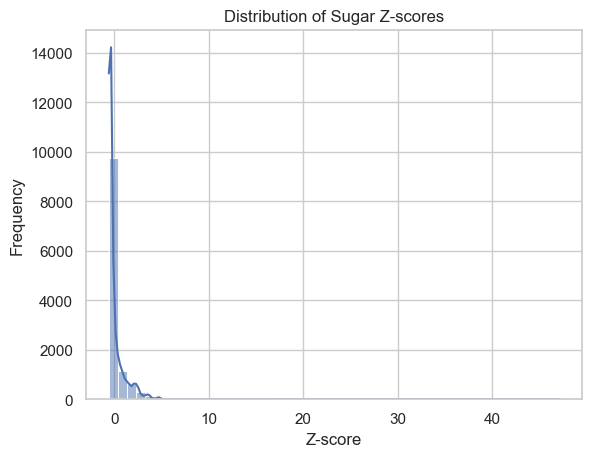

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Z-scores
sns.histplot(df_final['sugar_zscore'], bins=50, kde=True)
plt.title('Distribution of Sugar Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()


In [87]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for consistency
sns.set(style="whitegrid")


In [ ]:
# Drop rows where either 'carbohydrates_value' or 'sugar_to_carb_ratio' is missing
df_cleaned = df_final.dropna(subset=['carbohydrates_value', 'sugar_to_carb_ratio'])

#temporarirly dropped rows with missing values in carbohydrates_value and sugar_to_carb_ratio to ensure our visualizations without gaps

In [ ]:
# Impute missing carbs with global median
carb_median = df_final['carbohydrates_value'].median()
df_final['carbohydrates_value'] = df_final['carbohydrates_value'].fillna(carb_median)


In [101]:
df_final['sugar_to_carb_ratio'] = df_final['sugars_value'] / df_final['carbohydrates_value']


In [103]:
# Step 1: Precompute brand-level medians
brand_medians = df_final.groupby('brand')['carbohydrates_value'].median()

# Step 2: Map medians to missing values
df_final['carbohydrates_value'] = df_final['carbohydrates_value'].fillna(
    df_final['brand'].map(brand_medians)
)


In [104]:
missing_summary = df_final.isnull().sum()
print("Missing values per column:\n", missing_summary)


Missing values per column:
 product_code                                             0
product_name                                             0
brand                                                    0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
brand_missing               

In [105]:
# Returns True if no missing values exist
is_clean = df_final.isnull().sum().sum() == 0
print("Dataset fully clean:", is_clean)


Dataset fully clean: True


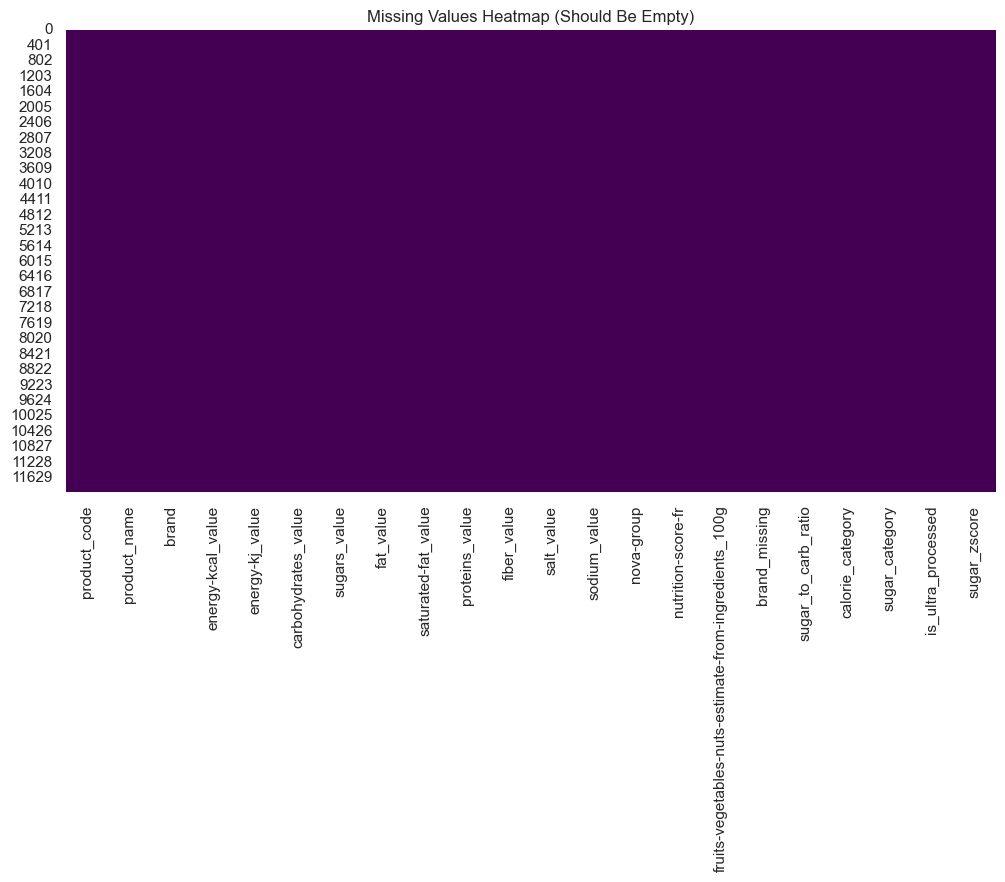

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (Should Be Empty)")
plt.show()


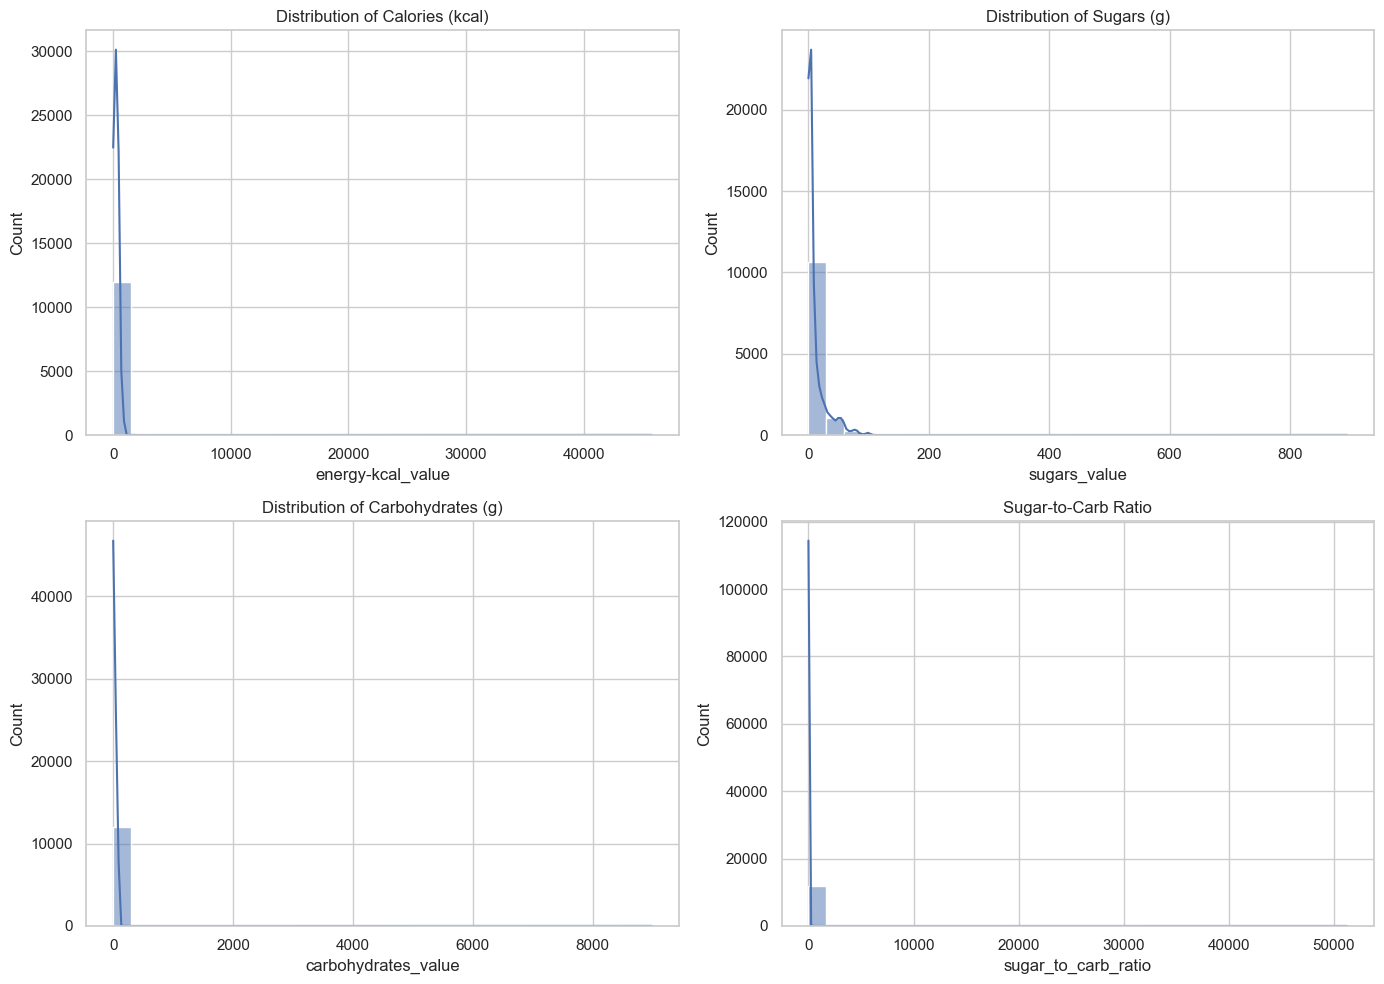

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid for histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot calories
sns.histplot(df_final['energy-kcal_value'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Calories (kcal)')

# Plot sugars
sns.histplot(df_final['sugars_value'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Sugars (g)')

# Plot carbohydrates
sns.histplot(df_final['carbohydrates_value'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Carbohydrates (g)')

# Plot sugar-to-carb ratio
sns.histplot(df_final['sugar_to_carb_ratio'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Sugar-to-Carb Ratio')

# Adjust layout
plt.tight_layout()
plt.show()


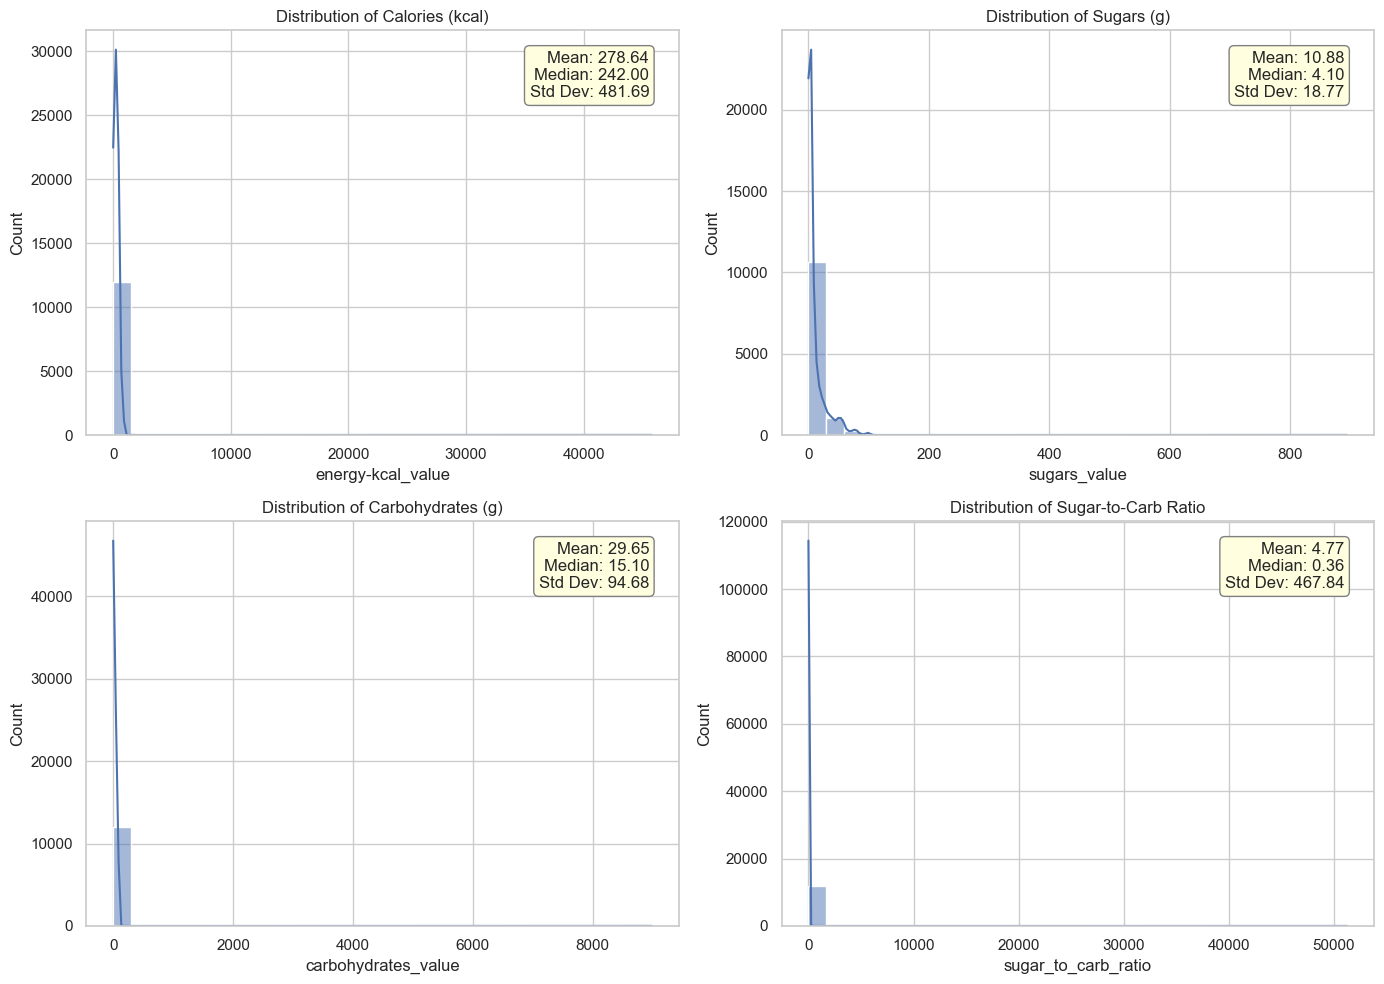

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of Key Nutritional Variables
# Define the columns to plot
columns = ['energy-kcal_value', 'sugars_value', 'carbohydrates_value', 'sugar_to_carb_ratio']
titles = ['Calories (kcal)', 'Sugars (g)', 'Carbohydrates (g)', 'Sugar-to-Carb Ratio']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each column and plot
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 2)
    ax = axes[row, col_pos]
    
    # Plot histogram with KDE
    sns.histplot(df_final[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {titles[i]}')
    
    # Calculate stats
    mean_val = df_final[col].mean()
    median_val = df_final[col].median()
    std_val = df_final[col].std()
    
    # Annotate stats on the plot
    stats_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}"
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", edgecolor="gray"))

# Adjust layout
plt.tight_layout()
plt.show()


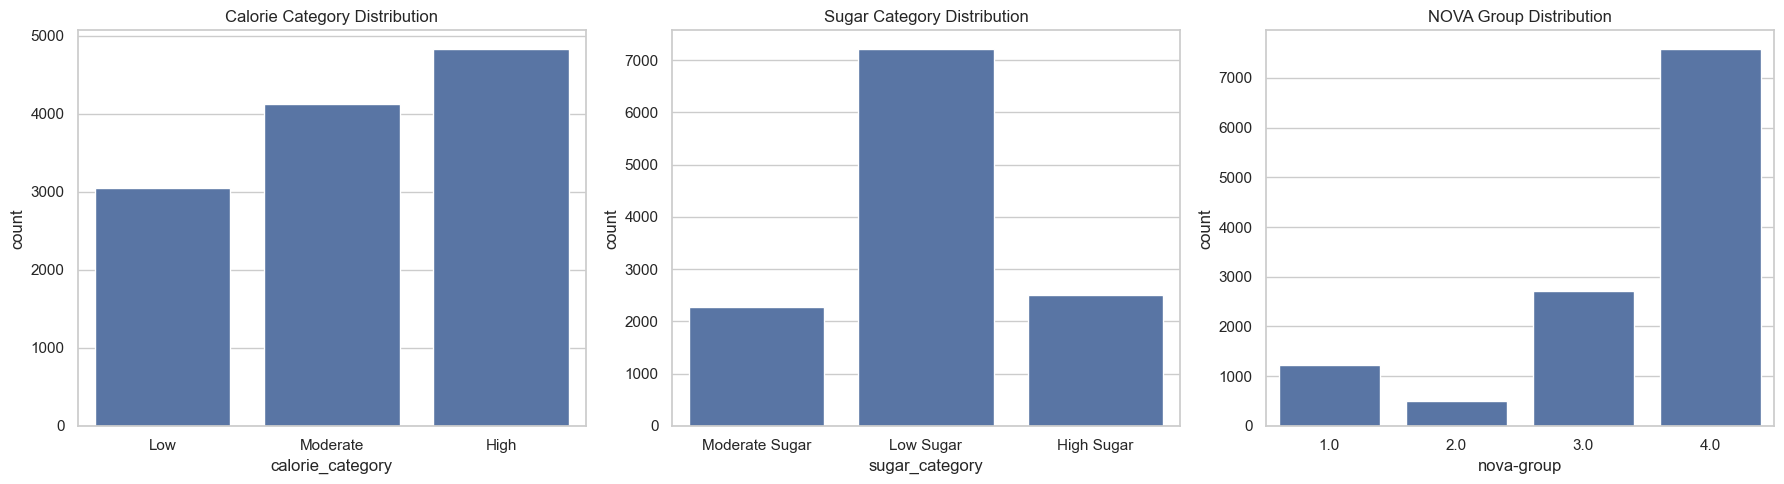

In [109]:
# Bar charts for category distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='calorie_category', data=df_final, ax=axes[0])
axes[0].set_title('Calorie Category Distribution')

sns.countplot(x='sugar_category', data=df_final, ax=axes[1])
axes[1].set_title('Sugar Category Distribution')

sns.countplot(x='nova-group', data=df_final, ax=axes[2])
axes[2].set_title('NOVA Group Distribution')

plt.tight_layout()
plt.show()


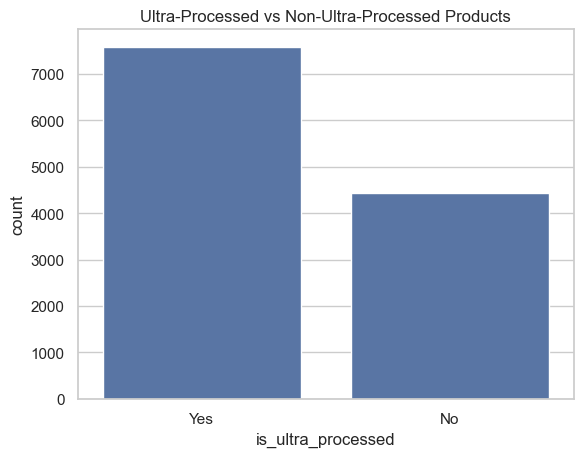

In [110]:
# Countplot for ultra-processed flag
sns.countplot(x='is_ultra_processed', data=df_final)
plt.title('Ultra-Processed vs Non-Ultra-Processed Products')
plt.show()


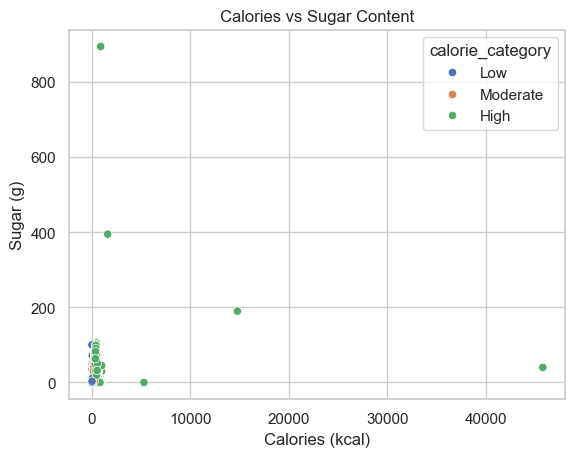

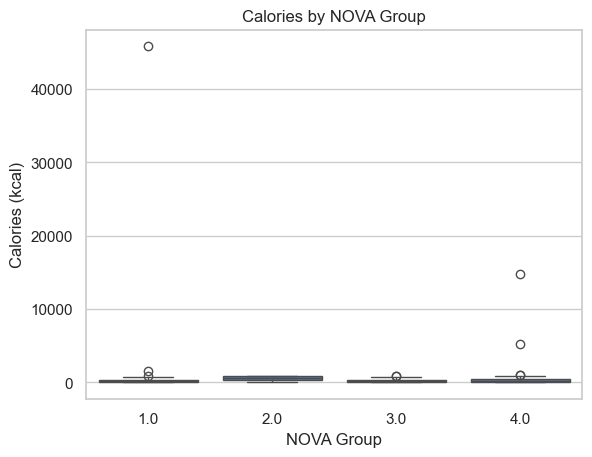

In [111]:
# Scatter plot: Calories vs Sugar
sns.scatterplot(x='energy-kcal_value', y='sugars_value', hue='calorie_category', data=df_final)
plt.title('Calories vs Sugar Content')
plt.xlabel('Calories (kcal)')
plt.ylabel('Sugar (g)')
plt.show()

# Boxplot: Calories across NOVA groups
sns.boxplot(x='nova-group', y='energy-kcal_value', data=df_final)
plt.title('Calories by NOVA Group')
plt.xlabel('NOVA Group')
plt.ylabel('Calories (kcal)')
plt.show()


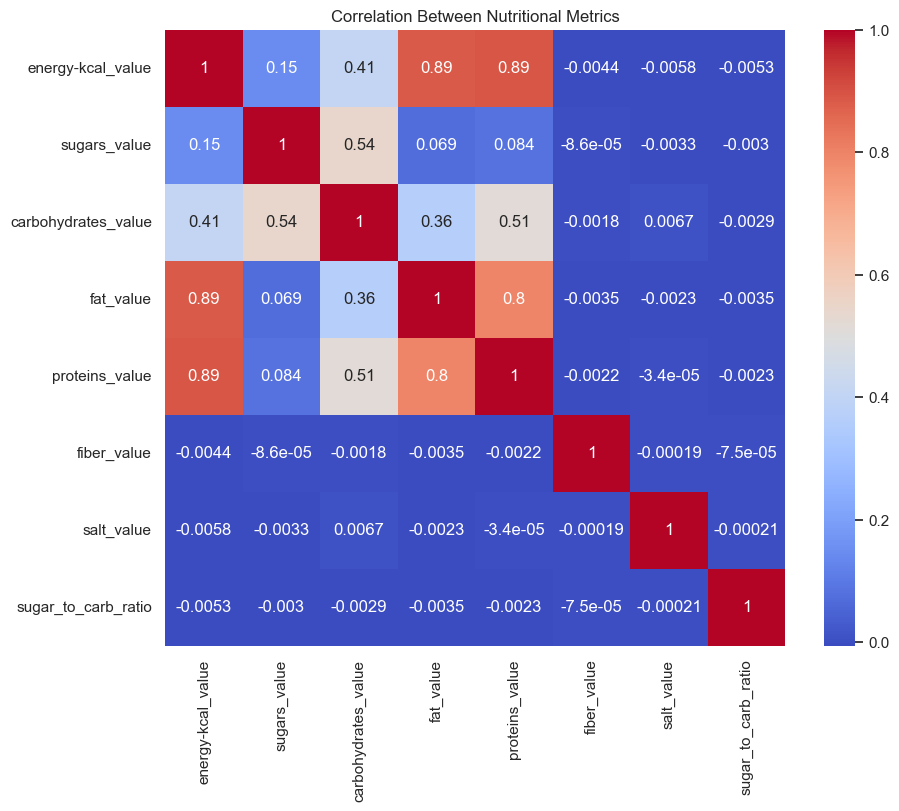

In [112]:
# Correlation heatmap for key nutrients
plt.figure(figsize=(10, 8))
sns.heatmap(df_final[['energy-kcal_value', 'sugars_value', 'carbohydrates_value', 'fat_value',
                      'proteins_value', 'fiber_value', 'salt_value', 'sugar_to_carb_ratio']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Between Nutritional Metrics')
plt.show()


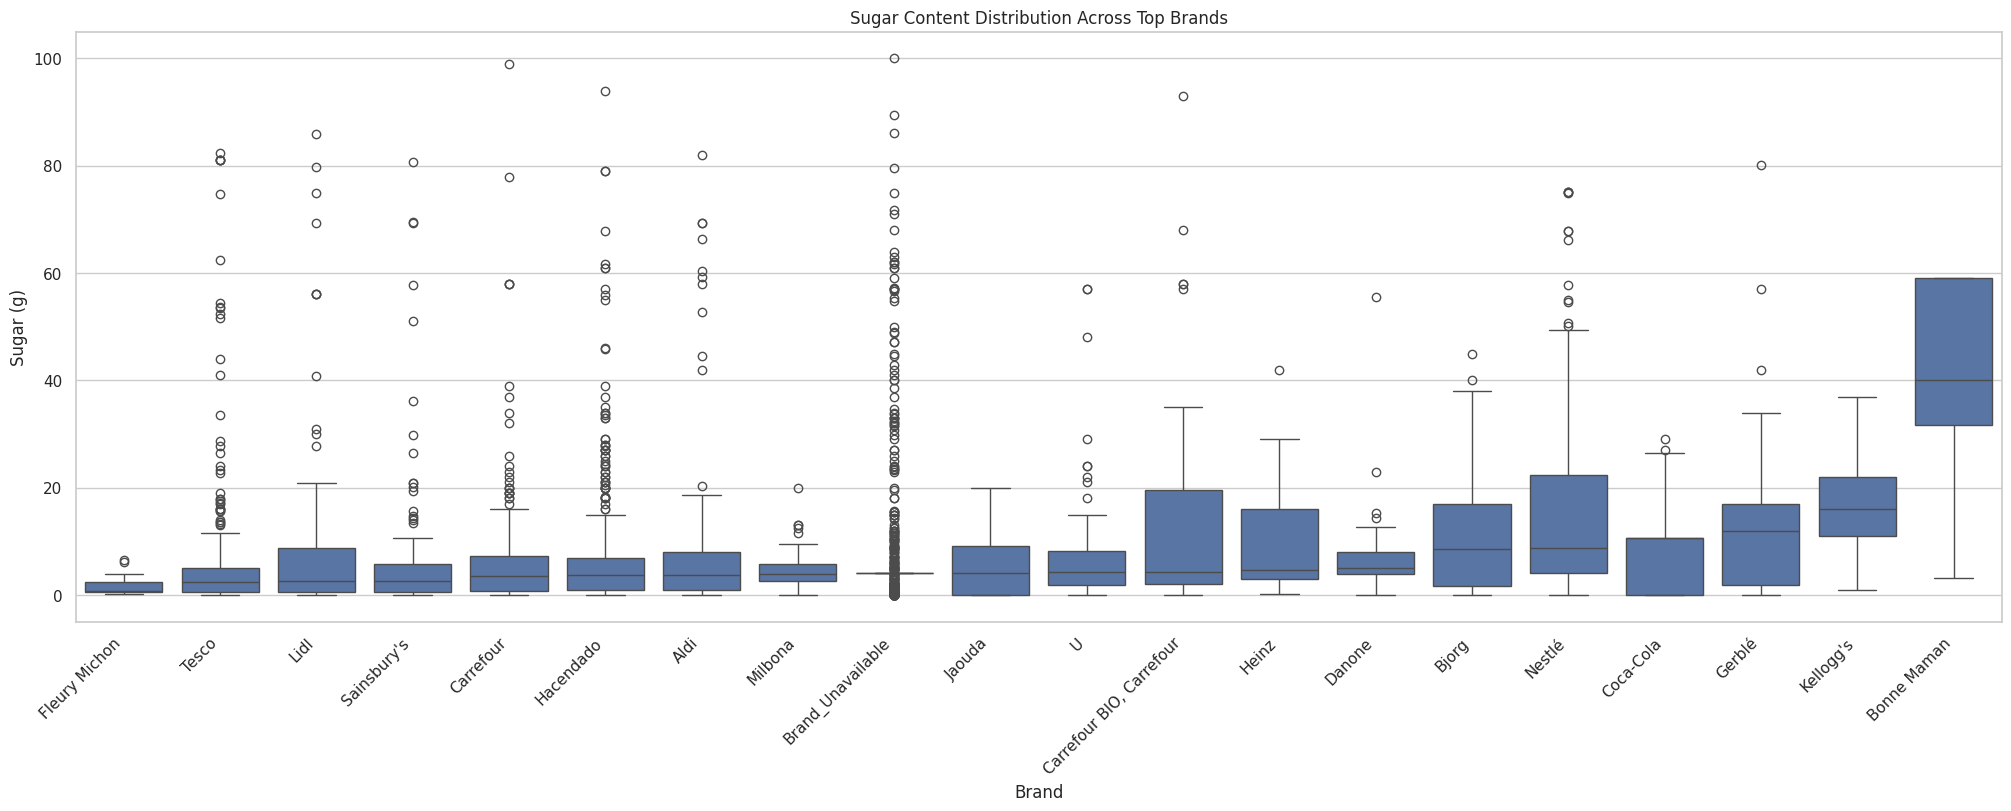

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a Unicode-friendly font to avoid glyph warnings
plt.rcParams['font.family'] = 'DejaVu Sans'

# Filter top brands by product count (optional, improves readability)
top_brands = df_final['brand'].value_counts().nlargest(20).index
df_subset = df_final[df_final['brand'].isin(top_brands)]

# Sort brands by median sugar content
brand_order = df_subset.groupby('brand')['sugars_value'].median().sort_values().index

# Create the plot with constrained layout
fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)
sns.boxplot(x='brand', y='sugars_value', data=df_subset, order=brand_order, ax=ax)

# Customize labels and title
ax.set_title('Sugar Content Distribution Across Top Brands')
ax.set_xlabel('Brand')
ax.set_ylabel('Sugar (g)')
plt.xticks(rotation=45, ha='right')

plt.show()


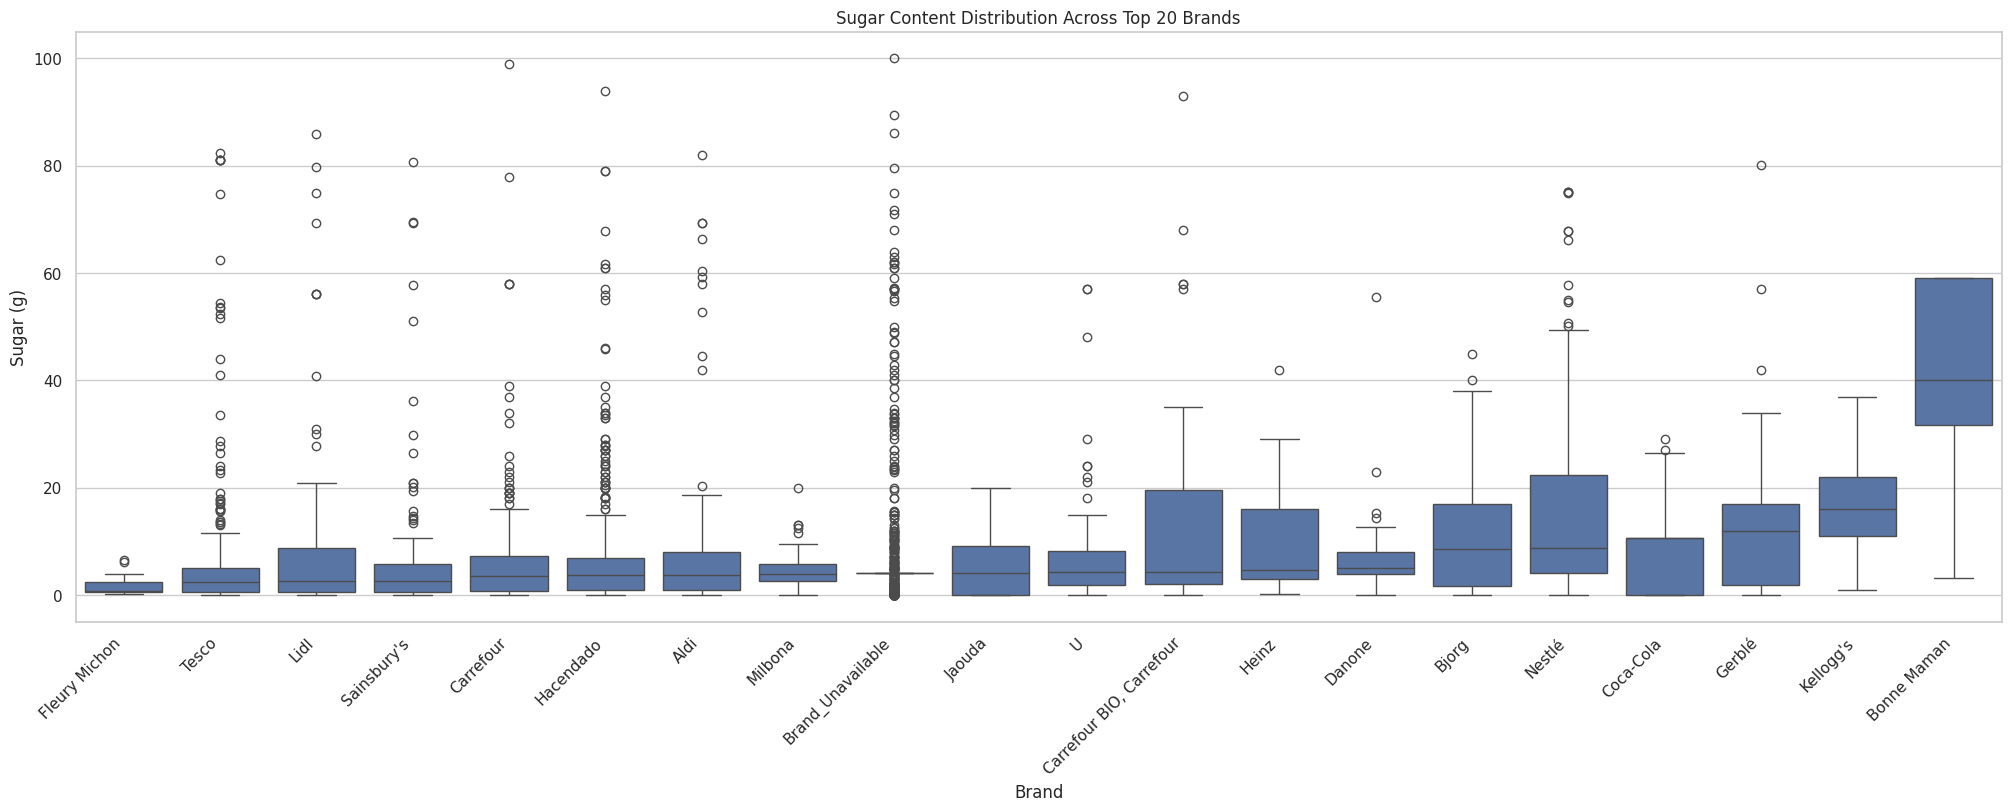

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a Unicode-friendly font to avoid glyph warnings
plt.rcParams['font.family'] = 'DejaVu Sans'

# Step 1: Filter top 20 brands by product count
top_brands = df_final['brand'].value_counts().nlargest(20).index
df_grouped = df_final[df_final['brand'].isin(top_brands)]

# Step 2: Sort brands by median sugar content
brand_order = df_grouped.groupby('brand')['sugars_value'].median().sort_values().index

# Step 3: Plot boxplot
fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)
sns.boxplot(x='brand', y='sugars_value', data=df_grouped, order=brand_order, ax=ax)

# Step 4: Customize labels
ax.set_title('Sugar Content Distribution Across Top 20 Brands')
ax.set_xlabel('Brand')
ax.set_ylabel('Sugar (g)')
plt.xticks(rotation=45, ha='right')

plt.show()


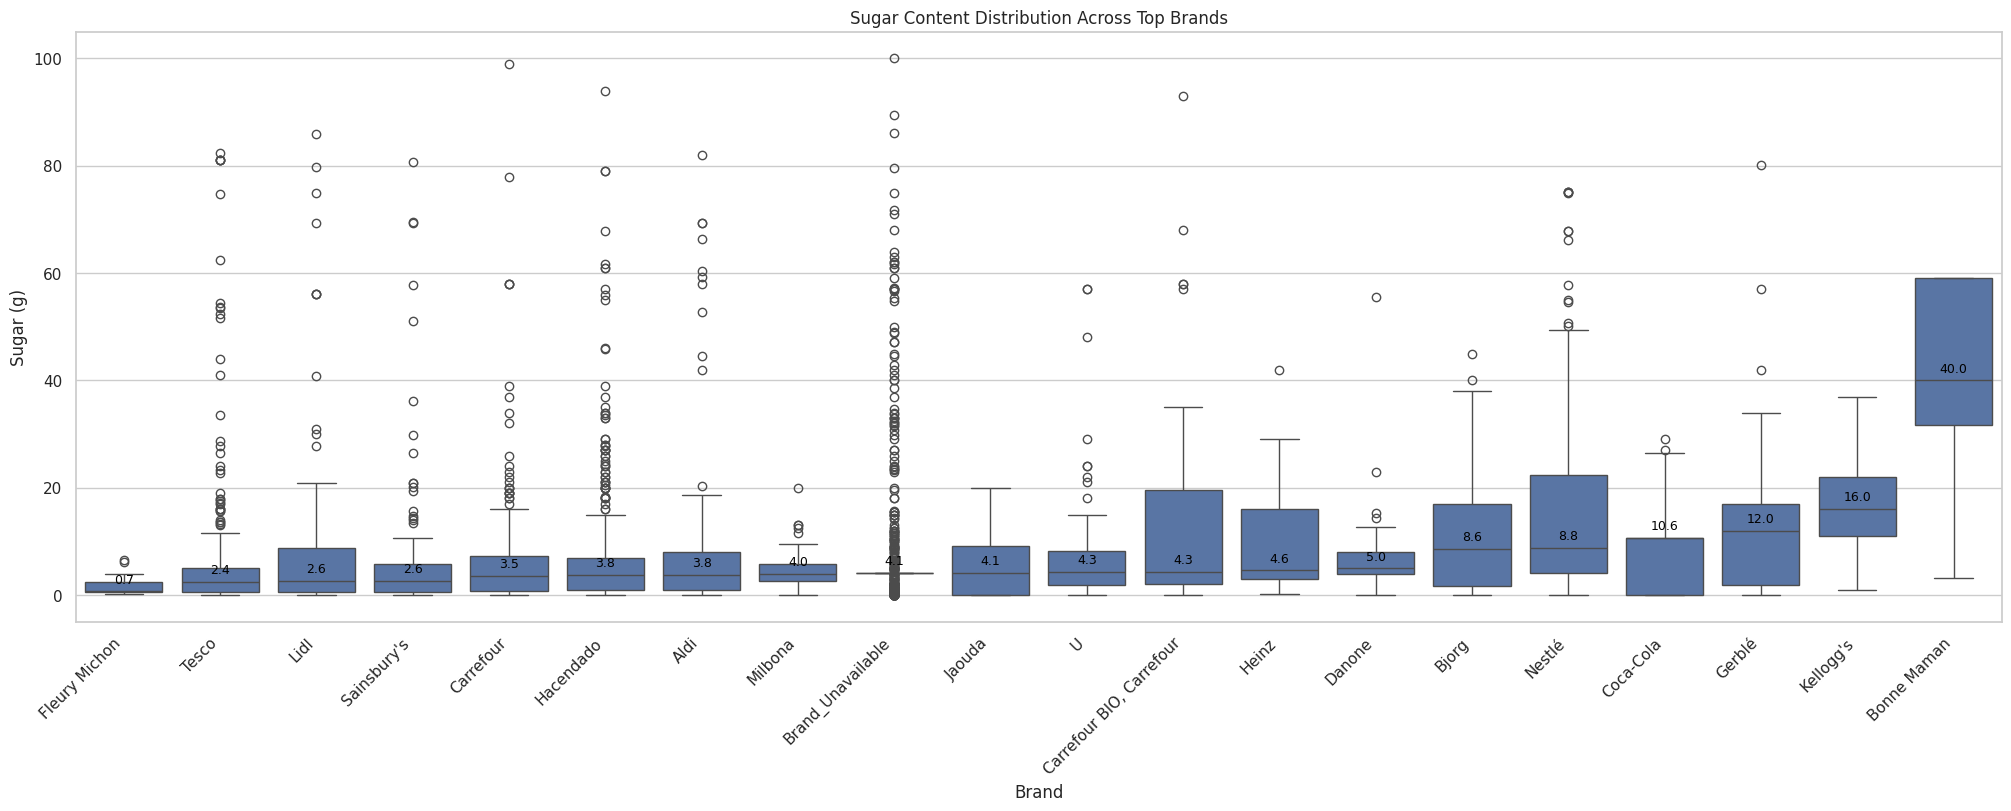

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a Unicode-friendly font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Filter top brands by product count
top_brands = df_final['brand'].value_counts().nlargest(20).index
df_subset = df_final[df_final['brand'].isin(top_brands)]

# Sort brands by median sugar
brand_order = df_subset.groupby('brand')['sugars_value'].median().sort_values().index

# Create plot
fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)
sns.boxplot(x='brand', y='sugars_value', data=df_subset, order=brand_order, ax=ax)

# Add median labels above each box
for i, brand in enumerate(brand_order):
    median_val = df_subset[df_subset['brand'] == brand]['sugars_value'].median()
    ax.text(i, median_val + 1, f"{median_val:.1f}", ha='center', va='bottom', fontsize=9, color='black')

# Customize plot
ax.set_title('Sugar Content Distribution Across Top Brands')
ax.set_xlabel('Brand')
ax.set_ylabel('Sugar (g)')
plt.xticks(rotation=45, ha='right')
plt.show()


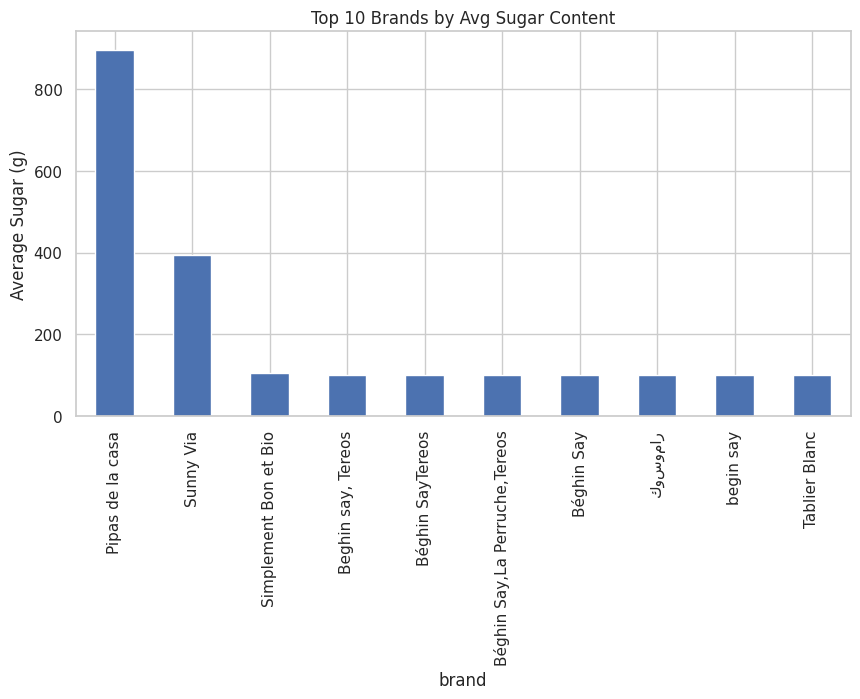

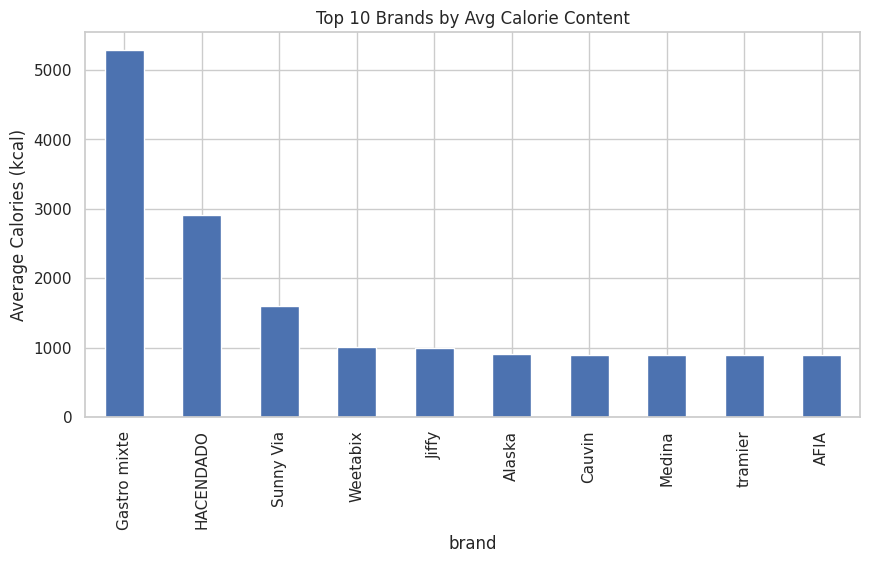

In [118]:
# Top 10 brands by average sugar
top_brands_sugar = df_final.groupby('brand')['sugars_value'].mean().sort_values(ascending=False).head(10)
top_brands_sugar.plot(kind='bar', figsize=(10, 5), title='Top 10 Brands by Avg Sugar Content')
plt.ylabel('Average Sugar (g)')
plt.show()

# Top 10 brands by average calories
top_brands_calories = df_final.groupby('brand')['energy-kcal_value'].mean().sort_values(ascending=False).head(10)
top_brands_calories.plot(kind='bar', figsize=(10, 5), title='Top 10 Brands by Avg Calorie Content')
plt.ylabel('Average Calories (kcal)')
plt.show()


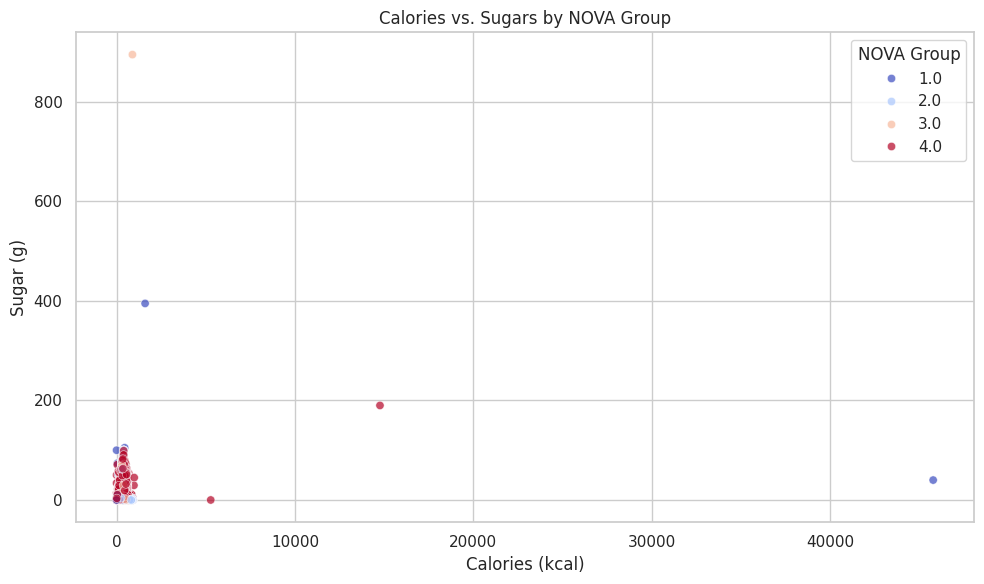

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy-kcal_value', y='sugars_value', data=df_final, hue='nova-group', palette='coolwarm', alpha=0.7)

plt.title('Calories vs. Sugars by NOVA Group')
plt.xlabel('Calories (kcal)')
plt.ylabel('Sugar (g)')
plt.legend(title='NOVA Group')
plt.tight_layout()
plt.show()


In [121]:
df_filtered = df_final[df_final['energy-kcal_value'] <= 1500]


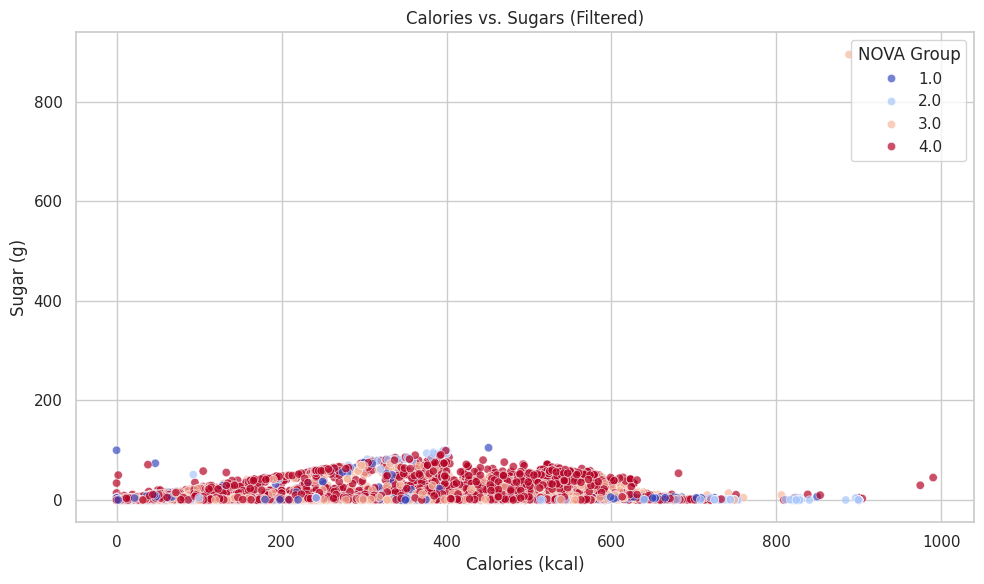

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='energy-kcal_value',
    y='sugars_value',
    data=df_filtered,
    hue='nova-group',
    palette='coolwarm',
    alpha=0.7
)

plt.title('Calories vs. Sugars (Filtered)')
plt.xlabel('Calories (kcal)')
plt.ylabel('Sugar (g)')
plt.legend(title='NOVA Group')
plt.tight_layout()
plt.show()


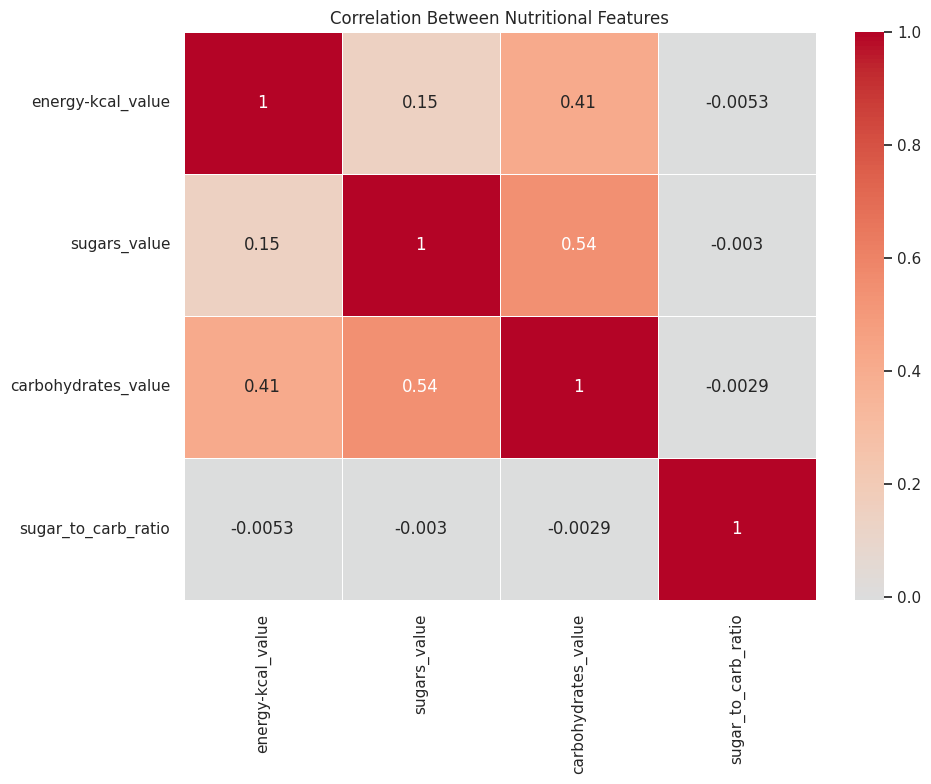

In [120]:
plt.figure(figsize=(10, 8))
corr_matrix = df_final[['energy-kcal_value', 'sugars_value', 'carbohydrates_value', 'sugar_to_carb_ratio']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Between Nutritional Features')
plt.tight_layout()
plt.show()


In [124]:
df_final.shape

(12000, 22)

In [125]:
df_final.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'brand_missing', 'sugar_to_carb_ratio', 'calorie_category',
       'sugar_category', 'is_ultra_processed', 'sugar_zscore'],
      dtype='object')

In [ ]:
# Save the final cleaned DataFrame to a CSV file
df_final.to_csv("env\data\df_final.csv", index=False)
